In [267]:
import pandas as pd
from fastai.tabular import *
from fastai.callbacks import *

In [277]:
path = Path('../data')

In [278]:
df = pd.read_csv(path/'interim/02_classification_split_urls.csv', error_bad_lines=False, index_col=0)

In [279]:
df

,Primary Category,Secondary Category,Title,URL,scheme,netloc,url1,url2,url3,url4,url5,url6
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/,http,"['www', 'sixty8', 'com']",www,sixty8,com,NaN,NaN,NaN
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/,http,"['www', 'abandonedcommunities', 'co', 'uk']",www,abandonedcommunities,co,uk,NaN,NaN
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/,http,"['www', 'greekthomson', 'com']",www,greekthomson,com,NaN,NaN,NaN
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/,http,"['www', 'arabbritishcentre', 'org', 'uk']",www,arabbritishcentre,org,uk,NaN,NaN
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/,http,"['www', 'aaschool', 'ac', 'uk']",www,aaschool,ac,uk,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
26793,Travel & Tourism,Cornwall,"West Briton and Cornwall Advertiser - transcription of the original newspaper, 1836 - 1887",http://freepages.genealogy.rootsweb.ancestry.com/~wbritonad/,http,"['freepages', 'genealogy', 'rootsweb', 'ancestry', 'com']",freepages,genealogy,rootsweb,ancestry,com,NaN
26794,Travel & Tourism,Cornwall,West Cornwall Community Network,http://www.wccn.org.uk/,http,"['www', 'wccn', 'org', 'uk']",www,wccn,org,uk,NaN,NaN
26795,Travel & Tourism,Cornwall,West Penwith Resources,http://www.west-penwith.org.uk/,http,"['www', 'west-penwith', 'org', 'uk']",www,west-penwith,org,uk,NaN,NaN
26796,Travel & Tourism,Cornwall,Yeate Farm - the Granary self-catering accommodation,http://www.yeatefarm.co.uk/,http,"['www', 'yeatefarm', 'co', 'uk']",www,yeatefarm,co,uk,NaN,NaN


In [280]:
len(df.url3.unique())

279

In [281]:
df.url1.unique()

array(['www', 'architecturemps', 'news', 'projects', ..., 'devotedtotravel', 'wikitravel', 'walking',
       'specialolympicswales'], dtype=object)

In [282]:
sample = int(len(df)*0.3)
df_sample = df.sample(sample)
df_sample['is_valid'] = True
df['is_valid'] = False
dfs = [df, df_sample]
df = pd.concat(dfs)
df

,Primary Category,Secondary Category,Title,URL,scheme,netloc,url1,url2,url3,url4,url5,url6,is_valid
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/,http,"['www', 'sixty8', 'com']",www,sixty8,com,NaN,NaN,NaN,False
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/,http,"['www', 'abandonedcommunities', 'co', 'uk']",www,abandonedcommunities,co,uk,NaN,NaN,False
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/,http,"['www', 'greekthomson', 'com']",www,greekthomson,com,NaN,NaN,NaN,False
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/,http,"['www', 'arabbritishcentre', 'org', 'uk']",www,arabbritishcentre,org,uk,NaN,NaN,False
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/,http,"['www', 'aaschool', 'ac', 'uk']",www,aaschool,ac,uk,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17043,History,Slavery and Abolition in the Caribbean,Westminster City Council: Westminster and the Transatlantic Slave Trade,http://www.westminster.gov.uk/workspace/assets/publications/Westminster-and-the-Transatlantic-S-1243442792.pdf,http,"['www', 'westminster', 'gov', 'uk']",www,westminster,gov,uk,NaN,NaN,True
20116,Science & Technology,Cambridge Network,Aveillant Ltd,http://www.aveillant.com/,http,"['www', 'aveillant', 'com']",www,aveillant,com,NaN,NaN,NaN,True
19564,"Politics, Political Theory and Political Systems","Religion, politics and law since 2005",Religion Law UK,http://www.neiladdison.pwp.blueyonder.co.uk/religionlaw.co.uk/,http,"['www', 'neiladdison', 'pwp', 'blueyonder', 'co', 'uk']",www,neiladdison,pwp,blueyonder,co,uk,True
25551,Society & Culture,Travel & Tourism,Backpacking Guide,http://www.the-backpacking-site.com/,http,"['www', 'the-backpacking-site', 'com']",www,the-backpacking-site,com,NaN,NaN,NaN,True


In [283]:
df.to_csv(path/'processed/03_classification_valid_train.csv')

## Drop 

In [276]:
df = df.drop(['URL','Secondary Category', 'netloc', 'Title','url2'],axis=1)

In [242]:
df

,Primary Category,scheme,url1,url3,url4,url5,url6
0,Arts & Humanities,http,www,com,NaN,NaN,NaN
1,Arts & Humanities,http,www,co,uk,NaN,NaN
2,Arts & Humanities,http,www,com,NaN,NaN,NaN
3,Arts & Humanities,http,www,org,uk,NaN,NaN
4,Arts & Humanities,http,www,ac,uk,NaN,NaN
...,...,...,...,...,...,...,...
26793,Travel & Tourism,http,freepages,rootsweb,ancestry,com,NaN
26794,Travel & Tourism,http,www,org,uk,NaN,NaN
26795,Travel & Tourism,http,www,org,uk,NaN,NaN
26796,Travel & Tourism,http,www,co,uk,NaN,NaN


In [243]:
df = df.reset_index(drop=True)

In [244]:
procs = [Categorify, FillMissing, Normalize]

In [245]:
dep_var = 'Primary Category'
cat_names = ['scheme', 
            'url1','url3','url4','url5','url6']



In [226]:
data_tab = (TabularList.from_df(df,cat_names=cat_names, procs=procs)
            .split_from_df('is_valid')
            .label_from_df('Primary Category')
            .databunch(bs=32))

In [227]:
data_tab.show_batch()

scheme,url1,url3,url4,url5,url6,target
http,www,co,uk,#na#,#na#,"Business, Economy & Industry"
http,www,org,#na#,#na#,#na#,Religion
http,blog,co,uk,#na#,#na#,"Government, Law & Politics"
http,www,org,#na#,#na#,#na#,Arts & Humanities
http,theoccupiedtimes,uk,#na#,#na#,#na#,Arts & Humanities


In [228]:
data_tab.c

24

In [261]:
def calcHiddenLayer(data, alpha, numHiddenLayers):
    tempData = data.train_ds
    i, o = len(tempData.x.classes), len(tempData.y.classes)
    io = i+o
    return [(len(data.train_ds)//(alpha*(io)))//numHiddenLayers]*numHiddenLayers

In [262]:
calcHiddenLayer(data_tab,2,1)

[580]

In [231]:
loss = LabelSmoothingCrossEntropy()

In [263]:
learn_tab = tabular_learner(data_tab,loss_func=loss, layers=[580], ps=[0.5], emb_drop=0.05, metrics=[accuracy])

learn_tab.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


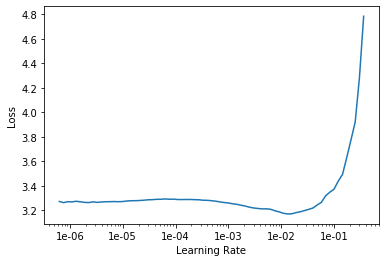

In [264]:
learn_tab.recorder.plot()

In [265]:
learn_tab.fit_one_cycle(30,max_lr=1e-02,
                        callbacks=[SaveModelCallback(learn_tab, every='improvement', monitor='accuracy', name='best')])

epoch,train_loss,valid_loss,accuracy,time
0,2.357961,2.265488,0.316716,00:14
1,2.372497,2.277443,0.312984,00:15
2,2.376848,2.337401,0.308200,00:14
3,2.375256,2.267613,0.327050,00:15
4,2.357211,2.322862,0.317099,00:16
5,2.338953,2.275720,0.304468,00:19
6,2.336944,2.312525,0.316907,00:22
7,2.337130,2.332968,0.293847,00:17
8,2.360661,2.290996,0.328007,00:15
9,2.305815,2.247687,0.319013,00:14


Better model found at epoch 0 with accuracy value: 0.31671610474586487.
Better model found at epoch 3 with accuracy value: 0.32705003023147583.
Better model found at epoch 8 with accuracy value: 0.32800689339637756.
Better model found at epoch 11 with accuracy value: 0.32829394936561584.
Better model found at epoch 14 with accuracy value: 0.3309731185436249.
Better model found at epoch 18 with accuracy value: 0.33317387104034424.
Better model found at epoch 20 with accuracy value: 0.337001234292984.
Better model found at epoch 21 with accuracy value: 0.33814945816993713.
Better model found at epoch 27 with accuracy value: 0.33968040347099304.


In [266]:
learn_tab.load('best')

Learner(data=TabularDataBunch;

Train: LabelList (34837 items)
x: TabularList
scheme http; url1 www; url3 com; url4 #na#; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 co; url4 uk; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 com; url4 #na#; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 org; url4 uk; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 ac; url4 uk; url5 #na#; url6 #na#; 
y: CategoryList
Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities
Path: .;

Valid: LabelList (10451 items)
x: TabularList
scheme http; url1 www; url3 org; url4 uk; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 com; url4 #na#; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 gov; url4 uk; url5 #na#; url6 #na#; ,scheme http; url1 dpta; url3 com; url4 #na#; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 org; url4 uk; url5 #na#; url6 #na#; 
y: CategoryList
Education & Research,Business, Economy & Industry,Government, Law & Politics,Education 